# Durables vs Non Durables Growth 10-year vs Quarterly Series

In [1]:
# Some initial setup
import sys
import os
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime as dt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as sm
import matplotlib.pyplot
import pylab
from copy  import deepcopy

In [2]:
# Import Quarterly data from Fred using Data Reader
import pandas_datareader.data as web

import datetime

start = datetime.datetime(1947, 1, 1) #beginning of series
start1 = datetime.datetime(1956, 10, 1) #beginning of series

end = datetime.datetime(2018, 4, 1) #end of series

PCDG = web.DataReader('PCDG', 'fred', start, end) #loads your durable goods quarterly series data
PCND=  web.DataReader('PCND', 'fred', start, end) #Loads your non durable goods quarterly series data
PCDG1 = web.DataReader('PCDG', 'fred', start1, end) #loads your durable goods quarterly series data, helps in having time series of identical length
PCND1=  web.DataReader('PCND', 'fred', start1, end) #Loads your non durable goods quarterly series data, , helps in having time series of identical length


In [3]:
# Constructing PCDG and PCND growth series () 
z1=PCDG.pct_change(periods=40)# 10*4
z2=PCND.pct_change(periods=40)#10*4
z3=PCDG1.pct_change(periods=1)# 
z4=PCND1.pct_change(periods=1)#
s1=z1*100 #(In percentage terms)
s2=z2*100 #(In percentage terms)
s3=z3*100 #(In percentage terms)
s4=z4*100 #(In percentage terms)

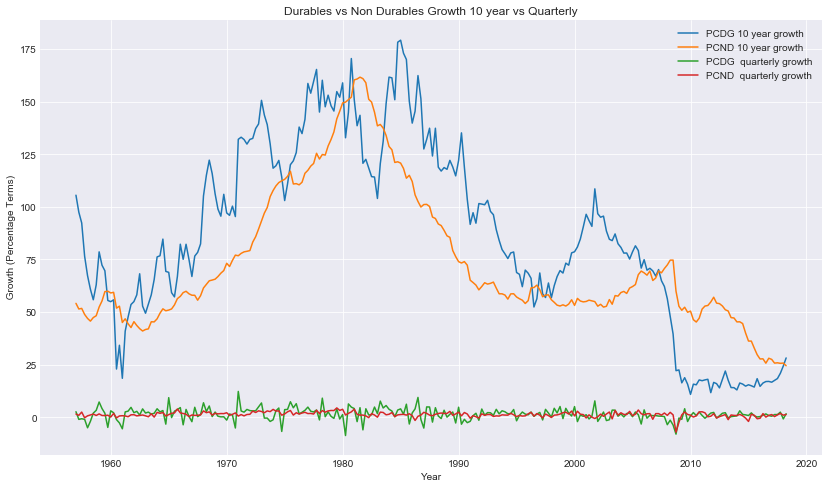

In [4]:
# Plotting the growth rates
plt.figure(figsize=((14,8))) # set the plot size
plt.title('Durables vs Non Durables Growth 10 year vs Quarterly')
plt.xlabel('Year')
plt.ylabel(' Growth (Percentage Terms)')
plt.plot(s1,label="PCDG 10 year growth")
plt.plot(s2,label="PCND 10 year growth")
plt.plot(s3,label="PCDG  quarterly growth")
plt.plot(s4,label="PCND  quarterly growth")
plt.legend()
plt.show()

In [5]:
# Drops the missing NAN observations

a1=s1.dropna()#Drops the missing values from s1 series
a2=s2.dropna()#Drops the missing values from s2 series
a3=s3.dropna()#Drops the missing values from s3 series
a4=s4.dropna()#Drops the missing values from s4 series

In [6]:
# concatate (merge) the two series
c1=pd.concat([a1, a2], axis=1)
c2=pd.concat([a3, a4], axis=1)

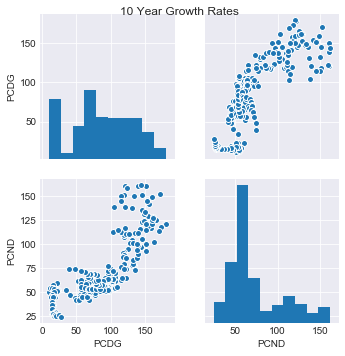

In [26]:
#Pairwise Plotting for the 10 year growth series

sns.pairplot(c1)
plt.suptitle('10 Year Growth Rates')
plt.show()

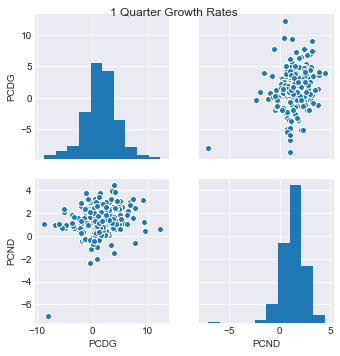

In [27]:
#Pairwise Plotting for the quarterly growth series

sns.pairplot(c2)
plt.suptitle('1 Quarter Growth Rates')
plt.show()

For each frequency [quarterly|10-year] each moment of time would correspond to a single point (x=nondurables growth, y=durables growth).  Such a plot shows that at the 10 year frequency, there is a very strong relationship between the two growth rates, and at the 1 quarter frequency, much much less.